In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier

In [2]:
df = pd.read_csv("C:\\Users\\ANJALI\\Downloads\\heart.csv")

In [5]:
df.shape

(918, 12)

In [7]:
df.head()


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [9]:
df['HeartDisease'].value_counts()

HeartDisease
1    508
0    410
Name: count, dtype: int64

In [11]:
df['ST_Slope'].value_counts()

ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: int64

In [13]:
df['RestingECG'].value_counts()

RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [17]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [21]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [23]:
label_cols = df.select_dtypes(include=['object']).columns
label_cols

Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')

In [25]:
lab_enc = LabelEncoder()
for col in label_cols:
    df[col] = lab_enc.fit_transform(df[col])
    
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


In [27]:
X = df.drop(columns=['HeartDisease'])
y = df['HeartDisease']

X.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,1,1,140,289,0,1,172,0,0.0,2
1,49,0,2,160,180,0,1,156,0,1.0,1
2,37,1,1,130,283,0,2,98,0,0.0,2
3,48,0,0,138,214,0,1,108,1,1.5,1
4,54,1,2,150,195,0,1,122,0,0.0,2


In [29]:
correlation = df.corr()
correlation

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
Age,1.000000,0.055750,-0.077150,0.254399,-0.095282,0.198039,-0.007484,-0.382045,0.215793,0.258612,-0.268264,0.282039
Sex,0.055750,1.000000,-0.126559,0.005133,-0.200092,0.120076,0.071552,-0.189186,0.190664,0.105734,-0.150693,0.305445
ChestPainType,-0.077150,-0.126559,1.000000,-0.020647,0.067880,-0.073151,-0.072537,0.289123,-0.354727,-0.177377,0.213521,-0.386828
RestingBP,0.254399,0.005133,-0.020647,1.000000,0.100893,0.070193,0.022656,-0.112135,0.155101,0.164803,-0.075162,0.107589
Cholesterol,-0.095282,-0.200092,0.067880,0.100893,1.000000,-0.260974,-0.196544,0.235792,-0.034166,0.050148,0.111471,-0.232741
FastingBS,0.198039,0.120076,-0.073151,0.070193,-0.260974,1.000000,0.087050,-0.131438,0.060451,0.052698,-0.175774,0.267291
RestingECG,-0.007484,0.071552,-0.072537,0.022656,-0.196544,0.087050,1.000000,-0.179276,0.077500,-0.020438,-0.006778,0.057384
MaxHR,-0.382045,-0.189186,0.289123,-0.112135,0.235792,-0.131438,-0.179276,1.000000,-0.370425,-0.160691,0.343419,-0.400421
ExerciseAngina,0.215793,0.190664,-0.354727,0.155101,-0.034166,0.060451,0.077500,-0.370425,1.000000,0.408752,-0.428706,0.494282
Oldpeak,0.258612,0.105734,-0.177377,0.164803,0.050148,0.052698,-0.020438,-0.160691,0.408752,1.000000,-0.501921,0.403951


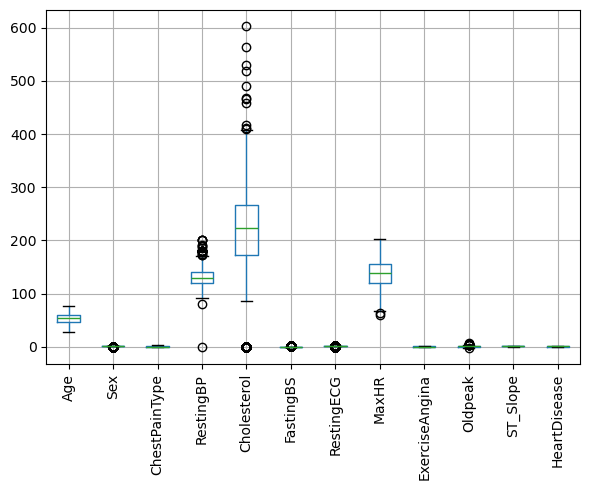

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,5))
df.boxplot()
plt.xticks(rotation=90)
plt.tight_layout()

In [33]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape

(734, 11)

In [35]:
y_train.value_counts()

HeartDisease
1    401
0    333
Name: count, dtype: int64

In [37]:
y_test.value_counts()

HeartDisease
1    107
0     77
Name: count, dtype: int64

In [39]:
401/333

1.2042042042042043

In [41]:
107/77

1.3896103896103895

In [43]:
y_train.head()

795    0
25     0
84     1
10     0
344    1
Name: HeartDisease, dtype: int64

In [45]:
X_train.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
795,42,1,2,120,240,1,1,194,0,0.8,0
25,36,1,2,130,209,0,1,178,0,0.0,2
84,56,1,0,150,213,1,1,125,1,1.0,1
10,37,0,2,130,211,0,1,142,0,0.0,2
344,51,1,0,120,0,1,1,104,0,0.0,1


In [47]:
X_train_copy = X_train.copy()
X_test_copy = X_test.copy()

In [49]:
X_train_copy.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
795,42,1,2,120,240,1,1,194,0,0.8,0
25,36,1,2,130,209,0,1,178,0,0.0,2
84,56,1,0,150,213,1,1,125,1,1.0,1
10,37,0,2,130,211,0,1,142,0,0.0,2
344,51,1,0,120,0,1,1,104,0,0.0,1


In [51]:
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train),index = X_train.index,columns=X_train.columns)


X_test = pd.DataFrame(scaler.fit_transform(X_test),index = X_test.index,columns = X_test.columns)

X_train.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
795,-1.245067,0.540605,1.316743,-0.708985,0.372803,1.842609,0.017342,2.284353,-0.838461,-0.097061,-2.257465
25,-1.886236,0.540605,1.316743,-0.166285,0.086146,-0.542709,0.017342,1.652241,-0.838461,-0.836286,1.079855
84,0.250993,0.540605,-0.809746,0.919115,0.123134,1.842609,0.017342,-0.441628,1.192662,0.087745,-0.588805
10,-1.779375,-1.849780,1.316743,-0.166285,0.104640,-0.542709,0.017342,0.229991,-0.838461,-0.836286,1.079855
344,-0.283314,0.540605,-0.809746,-0.708985,-1.846478,1.842609,0.017342,-1.271274,-0.838461,-0.836286,-0.588805


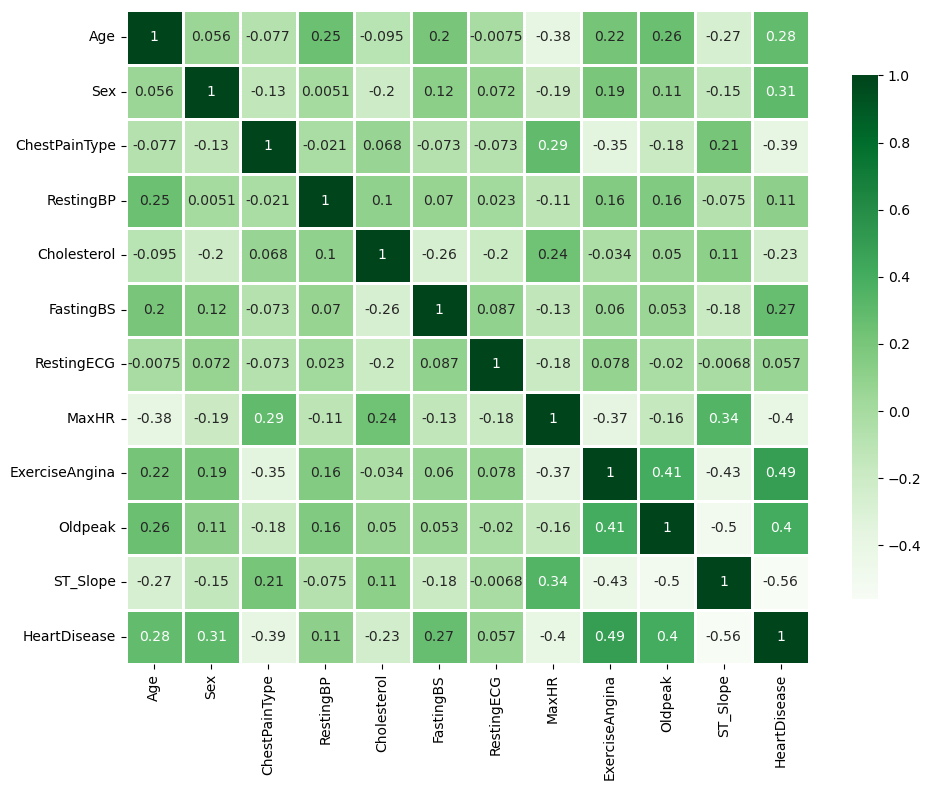

In [53]:
plt.figure(figsize=(10,8))
sns.heatmap(correlation,annot=True,cmap="Greens", fmt='.2g',linewidths=1, cbar_kws={'shrink': .8})
plt.tight_layout()

In [55]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 734 entries, 795 to 102
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             734 non-null    float64
 1   Sex             734 non-null    float64
 2   ChestPainType   734 non-null    float64
 3   RestingBP       734 non-null    float64
 4   Cholesterol     734 non-null    float64
 5   FastingBS       734 non-null    float64
 6   RestingECG      734 non-null    float64
 7   MaxHR           734 non-null    float64
 8   ExerciseAngina  734 non-null    float64
 9   Oldpeak         734 non-null    float64
 10  ST_Slope        734 non-null    float64
dtypes: float64(11)
memory usage: 68.8 KB


In [57]:
imp_cols = X_train.columns
imp_cols

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope'],
      dtype='object')

In [59]:
lr = LogisticRegression()
lr.fit(X_train[imp_cols],y_train)

LogisticRegression()

In [61]:
lr_pred = lr.predict(X_test[imp_cols])

In [63]:
lr_pred[:20]

array([0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0],
      dtype=int64)

In [65]:
accuracy = accuracy_score(y_test, lr_pred)
accuracy*100

85.86956521739131

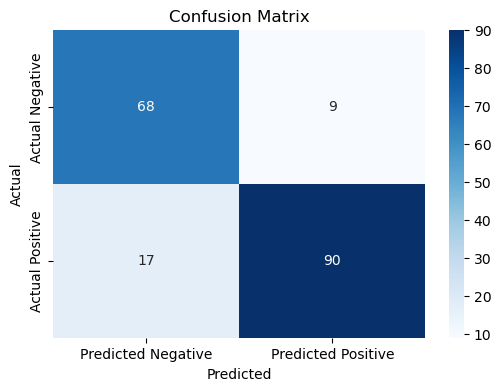

In [67]:
cm = confusion_matrix(y_test, lr_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', 
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [69]:
svm_classifier = SVC(kernel='linear', C=1.0)


svm_classifier.fit(X_train_copy[imp_cols], y_train)


y_pred = svm_classifier.predict(X_test_copy[imp_cols])


accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8369565217391305

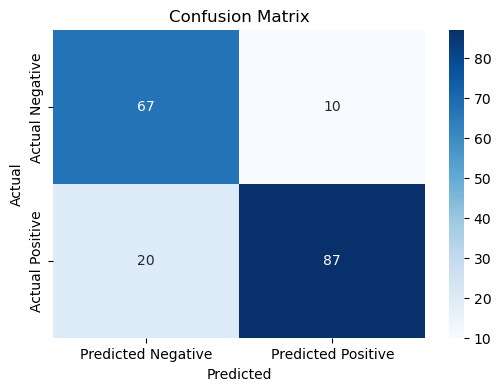

In [71]:
cm2 = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm2, annot=True, cmap='Blues', fmt='g', 
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [73]:
dt_classifier = DecisionTreeClassifier(random_state=42)

dt_classifier.fit(X_train_copy[imp_cols], y_train)

y_pred_class = dt_classifier.predict(X_test_copy[imp_cols])

accuracy = accuracy_score(y_test, y_pred_class)
accuracy

0.782608695652174

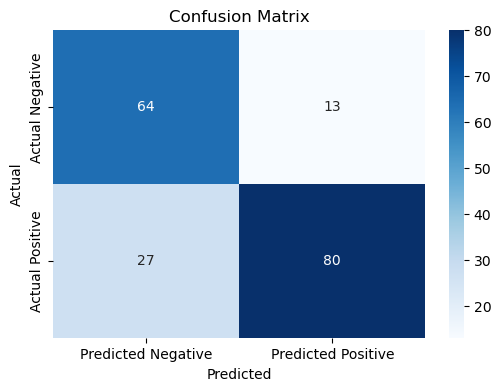

In [75]:
cm3 = confusion_matrix(y_test, y_pred_class)


plt.figure(figsize=(6, 4))
sns.heatmap(cm3, annot=True, cmap='Blues', fmt='g', 
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [81]:
pip install xgboost

In [84]:
import xgboost as xgb
dtrain = xgb.DMatrix(X_train_copy[imp_cols], label=y_train)
dtest = xgb.DMatrix(X_test_copy[imp_cols], label=y_test)

params = {
    'objective': 'multi:softmax',
    'num_class': 3,
    'max_depth': 3,
    'eta': 0.3,
    'eval_metric': 'merror'
}

num_rounds = 10
xgb_model = xgb.train(params, dtrain, num_rounds)

y_pred_xgb = xgb_model.predict(dtest)

accuracy = accuracy_score(y_test, y_pred_xgb)
accuracy

0.8858695652173914

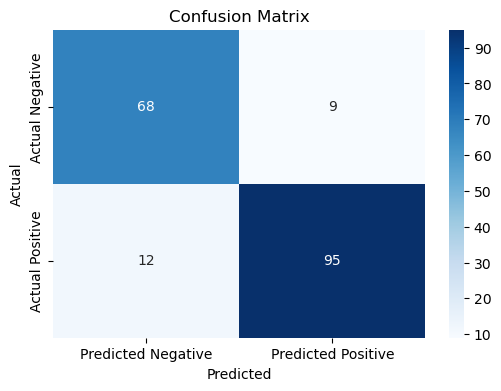

In [85]:
cm4 = confusion_matrix(y_test, y_pred_xgb)


plt.figure(figsize=(6, 4))
sns.heatmap(cm4, annot=True, cmap='Blues', fmt='g', 
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [88]:
import joblib

joblib.dump(xgb_model, 'Heart_Failure_Prediction_model.joblib')

['Heart_Failure_Prediction_model.joblib']

In [92]:
joblib.dump(lr, 'Heart_Failure_Prediction_lr_model.joblib')

['Heart_Failure_Prediction_lr_model.joblib']

In [94]:
loaded_model = joblib.load('Heart_Failure_Prediction_model.joblib')
y_pred_xgb = loaded_model.predict(dtest)


accuracy = accuracy_score(y_test, y_pred_xgb)
accuracy

0.8858695652173914